___

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

___
**_Bitte beachten:_**

- In Code-Zellen soll (bei Bedarf kommentierter) Code eingefügt werden. In Raw-Zellen erwarten wir Antworten im Freitext-Format.
- Fragestellungen sind teilweise bewusst etwas offener formuliert, weil Sie auch im Arbeitsleben nur selten mit ganz spezifischen Anweisungen rechnen können.Es gibt häufig mehrere mögliche Lösungen, dies wird in der Korrektur  berücksichtigt.

___

# (I can't get no) satisfaction
Wir arbeiten weiterhin mit dem Datensatz über die Zufriedenheit von Angestellten einer fiktiven Firma. In dieser Kurseinheit werden wir einige Techniken zur Datenvisualisierung anwenden.

*Hinweise:*
- *Für die Visualisierungsaufgaben gibt es meist unterschiedliche Lösungswege. Wir verwenden in den meisten Fällen die Bibliothek `matplotlib`. Sie können die Aufgaben auch mit anderen Bibliotheken, wie z.B. `seaborn`, lösen. Denken Sie in dem Fall daran, die entsprechende Bibliothek zu installieren und zu importieren.*
- *Denken Sie bei der Erstellung der Plots an Titel und Achsenbeschriftung!*

**Daten laden**

Wir verwenden nun den transformierten Datensatz aus KE3. Sollten Sie die Aufgaben aus KE3 erfolgreich absolviert haben, können Sie Ihren Datensatz verwenden, ansonsten finden Sie die entsprechende csv-Datei (`employees_satisfaction_transformed.csv`) im Moodle.

In [13]:
# Datensatz laden
# Laden Sie den Datensatz wieder so, dass die erste Spalte als Index (Row Label) verwendet wird
# Wir verwenden hier den transformierten Datensatz aus KE3
df = pd.read_csv('./employees_satisfaction_transformed.csv', index_col=0)

Für Datumsberechnungen wandeln wir wieder den Datentyp von `entry_date` um.

In [14]:
df["entry_date"] = pd.to_datetime(df["entry_date"], format="%Y-%m-%d")

In [15]:
df

,age,department,education,recruitment_type,job_level,rating,awards,certifications,salary,gender,entry_date,satisfied
0,28,HR,Postgraduate,Referral,5,2.0,1,0,78075.0,Male,2019-02-01,1
1,50,Technology,Postgraduate,Recruitment Agency,3,5.0,2,1,38177.1,Male,2017-01-17,0
2,43,Technology,Undergraduate,Referral,4,1.0,2,0,59143.5,Female,2012-08-27,1
3,44,Sales,Postgraduate,On-Campus,2,3.0,0,0,26824.5,Female,2017-07-25,1
4,33,HR,Undergraduate,Recruitment Agency,2,1.0,5,0,26824.5,Male,2019-05-17,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,49,HR,Postgraduate,On-Campus,2,5.0,6,0,26824.5,Male,2014-03-21,1
496,24,Technology,Undergraduate,Referral,2,4.0,2,0,26824.5,Female,2018-02-20,0
497,34,Marketing,Postgraduate,On-Campus,1,Unavailable,2,0,21668.4,Male,2020-10-20,1
498,26,Technology,Undergraduate,Walk-in,2,1.0,1,1,26824.5,Male,2012-05-18,0


## Data Analysis

### Alter

**Wie ist das durchschnittliche Alter der Angestellten? Unterscheidet sich dieses, in Abhängigkeit von der Abteilung?**

In [16]:
# Ihre Lösung

df['age'].mean()

39.670682730923694

In [24]:
df.groupby('department')['age'].mean()

department
HR            39.367925
Marketing     38.784946
Purchasing    40.140351
Sales         38.816092
Technology    41.051020
Name: age, dtype: float64

**In welcher Abteilung arbeitet der älteste Mann, in welcher die jüngste Frau?**

In [32]:
# Ihre Lösung
males = df[df['gender']=='Male']
females = df[df['gender']=='Female']

68    Technology
Name: department, dtype: object

In [35]:
# Abteilung ältester Mann
males[males['age'] == males['age'].max()]['department']

68    Technology
Name: department, dtype: object

In [36]:
# Abteilung älteste Frau
females[females['age'] == females['age'].min()]['department']

276    HR
Name: department, dtype: object

### Awards

**Wie ist die durchschnittliche Anzahl Awards? Wie ist der Median? Welcher Wert ist aussagekräftiger?**

In [ ]:
# Ihre Lösung

In [42]:
# Mean
df['awards'].mean()

4.586345381526105

In [43]:
# Median
df['awards'].median()

5.0

### Zufriedenheit

**In welcher Abteilung sind die meisten zufriedenen Angestellten?**

In [51]:
# Ihre Lösung
satisfied = df[df['satisfied'] == 1]
satisfied['department'].value_counts().index[0]

'Purchasing'

**Und in welcher Abteilung sind die Angestellten im Schnitt am zufriedensten?**

In [58]:
# Ihre Lösung
df.groupby('department')['satisfied'].mean().sort_values(ascending=False).index[0]

department
Sales         0.804598
Technology    0.744898
Purchasing    0.701754
HR            0.688679
Marketing     0.645161
Name: satisfied, dtype: float64

### Fairness

**Gender Pay Gap**

Bekommen Männer und Frauen der fiktiven Firma das gleiche Gehalt?

In [63]:
males['salary'].mean()

47042.0794676806

In [62]:
females['salary'].mean()

43627.387500000004

In [61]:
# Ihre Analysen
males['salary'].mean() == females['salary'].mean()

False

In [66]:
#alternativ
df.groupby(['gender', 'job_level'])['salary'].mean()

gender   job_level
Female   1            21668.4
         2            26824.5
         3            38177.1
         4            59143.5
         5            78075.0
Male     1            21668.4
         2            26824.5
         3            38177.1
         4            59143.5
         5            78075.0
Unknown  1            21668.4
         4            59143.5
Name: salary, dtype: float64

In [67]:
df.groupby(['gender', 'job_level']).size()

gender   job_level
Female   1            49
         2            51
         3            38
         4            58
         5            36
Male     1            45
         2            57
         3            44
         4            50
         5            67
Unknown  1             1
         4             2
dtype: int64

Betrachten Sie den Datensatz weiterhin mit Fokus auf dem Thema *Fairness*. Was fällt Ihnen auf? Welche Aspekte könnte man noch untersuchen?

In [78]:
# Ihre Analysen
x = df.groupby(['gender','satisfied']).size()
x

gender   satisfied
Female   0             66
         1            166
Male     0             74
         1            189
Unknown  0              2
         1              1
dtype: int64

In [81]:
x.iloc[3]

189

In [82]:
print(f"Female: satisfied: {round(x.iloc[1]/len(females), 2)} / unsatisfied: {round(x.iloc[0]/len(females), 2)}")
print(f"Male: satisfied: {round(x.iloc[3]/len(males), 2)} / unsatisfied: {round(x.iloc[2]/len(males), 2)}")

Female: satisfied: 0.72 / unsatisfied: 0.28
Male: satisfied: 0.72 / unsatisfied: 0.28


## Data Visualization

### Säulendiagramm

**In welchem Department arbeiten die meisten Personen?**

Erstellen Sie zur Beantwortung der Frage ein Säulendiagramm, das die Anzahl Angestellte pro Department darstellt.

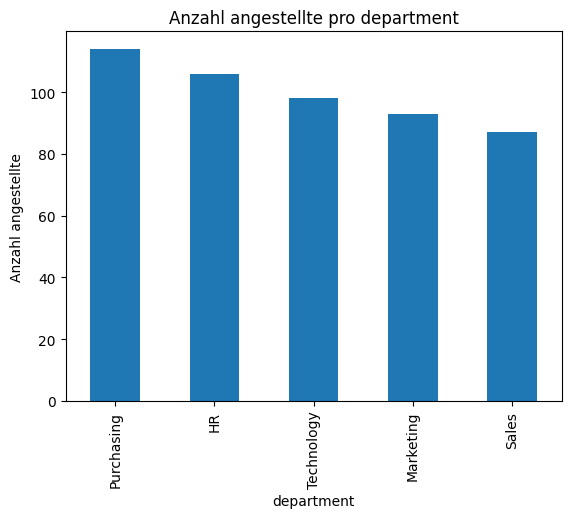

In [94]:
# Ihre Lösung
df['department'].value_counts().plot(kind='bar')
plt.title('Anzahl angestellte pro department')
plt.ylabel('Anzahl angestellte')  # Füge
plt.show()

**Unterscheidet sich die durchschnittliche Anzahl Awards, in Abhängigkeit von der Ausbildung, stark?**

Erstellen Sie hierfür wiederum ein Säulendiagramm.

In [99]:
# Ihre Lösung
df.groupby('education')['awards'].mean().plot(kind = )

education
Postgraduate     4.711462
Undergraduate    4.457143
Name: awards, dtype: float64

### Liniendiagramm

**Steigt das durchschnittliche Alter pro Job-Level, fällt es oder bleibt es ungefähr gleich?**

Beantworten Sie diese Frage mithilfe eines Liniendiagramms.

In [ ]:
# Ihre Lösung

**Verändert sich das Recruiting über die Jahre?**

Erstellen Sie hierzu ein Liniendiagramm, das die Anzahl der Angestellten über die Zeit (`entry_date`) in Abhängigkeit vom Recruitment-Typ darstellt.

In [ ]:
# Ihre Lösung

**Sind Angestellte mit einem höheren Gehalt im Schnitt zufriedener?**

Erstellen Sie hierzu ein Liniendiagramm, das pro Gehaltsklasse die durchschnittliche Zufriedenheit angibt.

In [ ]:
# Ihre Lösung

**Sind Angestellte, die schon länger in der Firma sind, im Schnitt zufriedener?**

Beantworten Sie diese Frage ebenfalls mithilfe eines Liniendiagramms. Gruppieren Sie die Angestellten dafür nach dem Einstellungsjahr (`df["entry_date"].dt.year`).

In [ ]:
# Ihre Lösung

### Kreisdiagramm

**Gibt es Abteilungen, in denen mehr Frauen als Männer arbeiten?**

Beantworten Sie diese Frage mithilfe von Kreisdiagrammen (ein Kreisdiagramm pro Abteilung).

In [ ]:
# Ihre Lösung